## Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from SeriesImputer import SeriesImputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

/Users/Coupang/anaconda/envs/tf3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Coupang/anaconda/envs/tf3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Load Data

In [2]:
raw_data = pd.read_csv('./dataset.tsv', sep='\t', na_values=['unknown', -1])

## Describe Data

In [3]:
raw_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,58,management,married,고학력,no,2143,yes,no,NaN,5,may,1,NaN,0,NaN,no
1,44,technician,single,중학력,no,29,yes,no,NaN,5,may,1,NaN,0,NaN,no
2,33,entrepreneur,married,중학력,no,2,yes,yes,NaN,5,may,1,NaN,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,1,NaN,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,1,NaN,0,NaN,no


In [4]:
for col in raw_data:
    print (raw_data[col].unique())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 56 32 25 40 39 52 36 49 60 59 37
 50 54 55 38 46 31 27 34 23 48 26 61 22 30 24 21 20 66 62 83 75 67 70 65 68
 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89 84 87 92
 93 88]
['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['married' 'single' 'divorced']
['고학력' '중학력' nan '저학력']
['no' 'yes']
[ 2143    29     2 ...,  8205 14204 16353]
['yes' 'no']
['no' 'yes']
[nan '무선' '유선']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17 18
 24 25  1 10 22 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21 51
 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 43 35 34 36 39 44]
[  nan  151.   91.   86.  143.  147.   89.  140.  176.  101.  174.  170.
  167.  195.  165.  129.  188.  196.  172.  118.  119.  104.  171.  117.
  16

In [5]:
raw_data.describe(include='all')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
count,40000.000000,39725,40000,38333,40000,40000.000000,40000,40000,28881,40000.000000,40000,40000.000000,7516.000000,40000.000000,7511,40000
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,3,2
top,NaN,management,married,중학력,no,NaN,yes,no,무선,NaN,may,NaN,NaN,NaN,failure,no
freq,NaN,8591,24116,20152,39635,NaN,21586,34189,26186,NaN,11674,NaN,NaN,NaN,4399,35099
mean,41.068150,NaN,NaN,NaN,NaN,1517.338050,NaN,NaN,NaN,15.749375,NaN,2.751550,221.138638,0.594400,NaN,NaN
std,10.745571,NaN,NaN,NaN,NaN,3150.922909,NaN,NaN,NaN,8.296992,NaN,3.070856,116.026470,2.347014,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,146.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,126.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,543.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,189.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1595.000000,NaN,NaN,NaN,21.000000,NaN,3.000000,322.000000,0.000000,NaN,NaN


In [6]:
raw_data.isnull().sum()

x1         0
x2       275
x3         0
x4      1667
x5         0
x6         0
x7         0
x8         0
x9     11119
x10        0
x11        0
x12        0
x13    32484
x14        0
x15    32489
y          0
dtype: int64

## Pre-processing

In [7]:
# Replace binary categorical values with 0, 1
le = LabelEncoder()
raw_data['x5'] = le.fit_transform(raw_data['x5'])
raw_data['x7'] = le.fit_transform(raw_data['x7'])
raw_data['x8'] = le.fit_transform(raw_data['x8'])

In [8]:
# x13 Connected to customers : 1, Not connected to customers : 0
# x15 Success : 1, Others : 0
raw_data['x13'] = np.where(raw_data['x13'].isnull(), 0, 1)
raw_data['x15'] = np.where(raw_data['x15'] == 'success', 1, 0)

In [9]:
raw_data['x10'] = raw_data['x10'].astype('category')

In [10]:
# Replace NaN values with mode values
si = SeriesImputer()
raw_data['x2'] = si.fit_transform(raw_data['x2'])
raw_data['x4'] = si.fit_transform(raw_data['x4'])
raw_data['x9'] = si.fit_transform(raw_data['x9'])

In [11]:
# Transform numerical values into same scale (between 0 and 1)
mms = MinMaxScaler()
raw_data['x1'] = mms.fit_transform(raw_data['x1'])
raw_data['x6'] = mms.fit_transform(raw_data['x6'])
raw_data['x12'] = mms.fit_transform(raw_data['x12'])
raw_data['x14'] = mms.fit_transform(raw_data['x14'])

/Users/Coupang/anaconda/envs/tf3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Coupang/anaconda/envs/tf3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Coupang/anaconda/envs/tf3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, Deprecatio

In [12]:
# Devide data into X and y
X = raw_data.iloc[:,:-1]
y = raw_data.iloc[:,-1]

In [13]:
# Encode y values to 0 and 1
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [14]:
# One-hot Ecoding for multi-class categorical variables of x
X = pd.get_dummies(X)

In [15]:
# Convert binary values to categorical values
X['x5'] = X['x5'].astype('category')
X['x7'] = X['x7'].astype('category')
X['x8'] = X['x8'].astype('category')
X['x13'] = X['x13'].astype('category')
X['x15'] = X['x15'].astype('category')

In [16]:
X.head()

,x1,x5,x6,x7,x8,x12,x13,x14,x15,x2_admin.,...,x11_dec,x11_feb,x11_jan,x11_jul,x11_jun,x11_mar,x11_may,x11_nov,x11_oct,x11_sep
0,0.519481,0,0.020984,1,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0,0.000284,1,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0,0.000020,1,1,0.0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0,0.014746,1,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0,0.000010,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Split Train and Test Data

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Feature Selection

### 1) Select From Model : Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=1000,
                            n_jobs=-1)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [23]:
importance = rf.feature_importances_
index = np.argsort(importance)[::-1]
cols = X_train.columns
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, cols[i], importance[index[i]]))

 1) x1                             0.159072
 2) x5                             0.143877
 3) x6                             0.060829
 4) x7                             0.057485
 5) x8                             0.032526
 6) x12                            0.026007
 7) x13                            0.015260
 8) x14                            0.015131
 9) x15                            0.014437
10) x2_admin.                      0.014006
11) x2_blue-collar                 0.013475
12) x2_entrepreneur                0.013014
13) x2_housemaid                   0.012994
14) x2_management                  0.012728
15) x2_retired                     0.012565
16) x2_self-employed               0.011986
17) x2_services                    0.011347
18) x2_student                     0.011307
19) x2_technician                  0.010823
20) x2_unemployed                  0.010772
21) x3_divorced                    0.010645
22) x3_married                     0.010601
23) x3_single                   

In [24]:
X_train_selected = rf.transform(X_train, threshold=0.01)
X_test_selected = rf.transform(X_test, threshold=0.01)

/Users/Coupang/anaconda/envs/tf3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Coupang/anaconda/envs/tf3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
scores_rf_1 = cross_val_score(estimator=rf,
                         X=X_train_selected,
                         y=y_train,
                         cv=10)
scores_rf_1.mean()

0.88290623562316761

In [27]:
lr = LogisticRegression(C=0.1, penalty='l2')
scores = cross_val_score(estimator=lr,
                        X=X_train_selected,
                        y=y_train,
                        cv=10)
scores.mean()

0.88709374556274379

In [ ]:
lr_model = lr.fit(X_train_selected, y_train)
y_pred = lr_model.predict(X_test_selected)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
acc

### RFE : Logistic Regression

In [28]:
lr = LogisticRegression(C=0.1, penalty='l2')
rfe = RFE(lr, n_features_to_select=2)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=2, step=1, verbose=0)

In [29]:
names = X_train.columns
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

[(1, 'x12'), (1, 'x15'), (2, 'x11_mar'), (3, 'x11_may'), (4, 'x11_jan'), (5, 'x11_nov'), (6, 'x11_jun'), (7, 'x11_jul'), (8, 'x11_aug'), (9, 'x7'), (10, 'x11_feb'), (11, 'x10_20'), (12, 'x2_student'), (13, 'x10_19'), (14, 'x10_17'), (15, 'x6'), (16, 'x8'), (17, 'x11_sep'), (18, 'x11_oct'), (19, 'x10_29'), (20, 'x10_10'), (21, 'x10_28'), (22, 'x10_31'), (23, 'x11_dec'), (24, 'x10_13'), (25, 'x2_retired'), (26, 'x3_married'), (27, 'x13'), (28, 'x9_유선'), (29, 'x9_무선'), (30, 'x11_apr'), (31, 'x10_22'), (32, 'x4_저학력'), (33, 'x10_30'), (34, 'x10_15'), (35, 'x10_12'), (36, 'x5'), (37, 'x10_25'), (38, 'x10_3'), (39, 'x2_housemaid'), (40, 'x10_27'), (41, 'x10_14'), (42, 'x10_23'), (43, 'x1'), (44, 'x10_4'), (45, 'x10_1'), (46, 'x4_중학력'), (47, 'x2_entrepreneur'), (48, 'x2_blue-collar'), (49, 'x10_7'), (50, 'x10_21'), (51, 'x10_9'), (52, 'x3_divorced'), (53, 'x3_single'), (54, 'x2_self-employed'), (55, 'x10_26'), (56, 'x2_services'), (57, 'x2_technician'), (58, 'x2_admin.'), (59, 'x2_management')

In [30]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [31]:
scores = cross_val_score(estimator=lr,
                         X=X_train_rfe,
                         y=y_train,
                         cv=10)
scores.mean()

0.88724995649413629

In [32]:
scores = cross_val_score(estimator=rf,
                         X=X_train_rfe,
                         y=y_train,
                         cv=10)
scores.mean()

0.88771872604369884

## Model Selection & Evaluation

### 1) Logistic Regression

In [34]:
p_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [36]:
train_scores, test_scores = validation_curve(estimator=lr,
                                             X=X_train_rfe,
                                             y=y_train,
                                             param_name='C',
                                             param_range=p_range,
                                             cv=10)

In [37]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

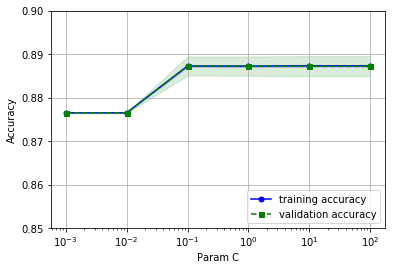

In [38]:
plt.plot(p_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(p_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(p_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(p_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Param C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.85, 0.9])
plt.show()

In [40]:
lr = LogisticRegression(C=0.1, penalty='l2')
scores = cross_val_score(estimator=lr,
                         X=X_train_rfe,
                         y=y_train,
                         cv=10)
scores.mean()

0.88724995649413629

### Random Forest

In [41]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
scores = cross_val_score(estimator=rf,
                         X=X_train_rfe,
                         y=y_train,
                         cv=10)
scores.mean()

0.88771872604369884

### SVM

In [49]:
svc = SVC(kernel='rbf')
scores = cross_val_score(estimator=svc,
                         X=X_train_rfe,
                         y=y_train,
                         cv=10)
scores.mean()

0.88724995649413629

In [50]:
svc_1 = SVC(kernel='linear')
scores = cross_val_score(estimator=svc_1,
                         X=X_train_rfe,
                         y=y_train,
                         cv=10)
scores.mean()

0.88724995649413629

### MLP

In [52]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2))

In [53]:
scores = cross_val_score(estimator=clf,
                        X=X_train_rfe,
                        y=y_train,
                        cv=10)
scores.mean()

0.88215627470398184

### Majority Vote

In [58]:
clf1 = LogisticRegression(penalty='l2', C=0.1)
clf2 = RandomForestClassifier(n_estimators=1000)
clf3 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2))
clf4 = SVC(kernel='linear', probability=True)

In [59]:
mv = VotingClassifier(estimators=[
    ('lr', clf1), ('mlp', clf3), ('svc', clf4)],
                         voting='soft')

In [60]:
scores = cross_val_score(estimator=mv,
                         X=X_train_rfe,
                         y=y_train,
                         cv=10)
scores.mean()

0.88268687037347371

## Evaluate with Test Data - Random Forest

In [63]:
rf_model = rf.fit(X_train_rfe, y_train)
y_pred = rf_model.predict(X_test_rfe)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
acc

0.89175000000000004